<a href="https://colab.research.google.com/github/farahjaafar/school_work/blob/main/Sem3_Big%20Data_Exercise1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_table("/content/drive/MyDrive/3rd Semester MPMD/MPMD3.2 Advanced Data Mining Techniques, Databases and Big Data/Exercise 1/TASK 1", 
                   header=None, names=['Package','Download'])
df

,Package,Download
0,A3,153
1,AATtools,45
2,ABACUS,63
3,ABC.RAP,66
4,ABCExtremes,3
...,...,...
17453,ztable,399
17454,ztpln,27
17455,ztype,33
17456,zyp,90


In [ ]:
df.dtypes

Package     object
Download     int64
dtype: object

In [ ]:
#sort dataframe
sorted_df = df.sort_values(by='Download', ascending=False)
sorted_df

,Package,Download
11247,magrittr,348642
5937,aws.s3,255261
5932,aws.ec2metadata,249162
10592,jsonlite,248586
14744,rsconnect,247191
...,...,...
5828,ascrda,3
11630,mimR,3
15894,sspir,3
193,AntAngiCool,3


In [ ]:
top25 = sorted_df.iloc[:25,] #First 25 row
top25

,Package,Download
11247,magrittr,348642
5937,aws.s3,255261
5932,aws.ec2metadata,249162
10592,jsonlite,248586
14744,rsconnect,247191
14488,rlang,216576
17001,vctrs,193269
9453,ggplot2,181074
8999,fs,179934
7945,dplyr,178389


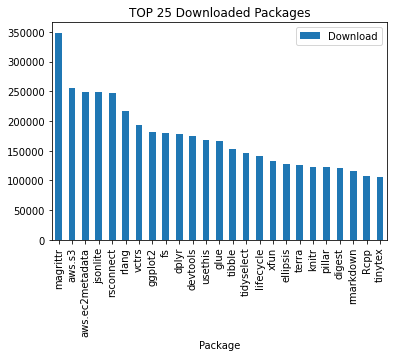

In [ ]:
top25.plot(kind='bar', title='TOP 25 Downloaded Packages', x='Package', y='Download')

#SECOND TASK --- CHART BY OS

In [ ]:
df1 = pd.read_table("/content/drive/MyDrive/3rd Semester MPMD/MPMD3.2 Advanced Data Mining Techniques, Databases and Big Data/Exercise 1/Part1-C(groupby_os)", 
                    header=None, names=['OS','Download'])
df1

,OS,Download
0,NaN,14557647
1,mingw32,1881672
2,linux-gnu,1622904
3,darwin17.0,9498
4,darwin13.4.0,38343
5,darwin15.6.0,96135
6,darwin17.6.0,228


In [ ]:
df2 = pd.read_table("/content/drive/MyDrive/3rd Semester MPMD/MPMD3.2 Advanced Data Mining Techniques, Databases and Big Data/Exercise 1/Part2-C(groupby_os)", 
                    header=None, names=['OS','Download'])
df2

,OS,Download
0,darwin10.8.0,546
1,darwin17.7.0,3
2,darwin18.0.0,36
3,darwin19.5.0,87
4,linux-gnueabi,894
5,linux-gnueabihf,4221


In [ ]:
df3 = pd.concat([df1,df2], ignore_index=True)
df3

,OS,Download
0,NaN,14557647
1,mingw32,1881672
2,linux-gnu,1622904
3,darwin17.0,9498
4,darwin13.4.0,38343
5,darwin15.6.0,96135
6,darwin17.6.0,228
7,darwin10.8.0,546
8,darwin17.7.0,3
9,darwin18.0.0,36


In [ ]:
df3 = df3.replace(['linux-gnueabihf','linux-gnueabi','linux-gnu'],'linux')
df3 = df3.replace(['darwin13.4.0','darwin15.6.0','darwin17.6.0','darwin10.8.0','darwin17.7.0','darwin18.0.0','darwin19.5.0','darwin17.0'],'mac')
df3 = df3.replace(['mingw32'],'windows')
df3

,OS,Download
0,NaN,14557647
1,windows,1881672
2,linux,1622904
3,mac,9498
4,mac,38343
5,mac,96135
6,mac,228
7,mac,546
8,mac,3
9,mac,36


In [ ]:
df3_group = df3.groupby('OS', as_index=False).aggregate(sum).reindex(columns=df3.columns)
df3_group = df3_group.sort_values(by='Download', ascending=False)
df3_group

,OS,Download
2,windows,1881672
0,linux,1628019
1,mac,144876


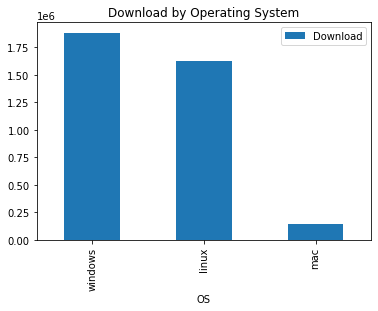

In [ ]:
df3_group.plot(kind='bar', title='Download by Operating System', x='OS', y='Download')